# Opgelet : waarschuwing

Bij 'Run all' draait dit notebookk vrij lang vanwege veel gegevens en het feit dat sommige instructies worden uiteengetrokken, over die vele data rijen, om de opbouw van gechainde statements duidelijk te maken.

In [1]:
# standard packages
import ast
import os
import sys


In [2]:
# extra to install packages
import urllib3
import pandas as pd
from tqdm import tqdm
import datetime
import matplotlib.pyplot as plt

In [3]:
# eigen packages modules
current_working_directory = os.getcwd()                                    
parent_working_directory = os.path.dirname(current_working_directory)      
scripts_directory = os.path.join(parent_working_directory, 'scripts')      
sys.path.append(scripts_directory)                                         
# sys.path.remove(scripts_directory)
# print(sys.path)

# Stap 1 : opladen van de gegevens (00:00)

Read in all waiting time csv files which are located in data/waiting times. Collect them in one big
dataframe where you add an additional column attraction in which you place the name of the attractions
(which can be taken from the filename).

In [33]:
os.getcwd()
# os.path.join('..','data','waitings_times')
location_waiting_times = os.path.join('..','data','waiting_times')
os.listdir(location_waiting_times)

['7_dwarfs_train.csv',
 'alien_saucers.csv',
 'ariel_s_grotto.csv',
 'astro_orbiter.csv',
 'barnstormer.csv',
 'big_thunder_mtn.csv',
 'buzz_lightyear.csv',
 'carousel_of_progress.csv',
 'casey_jr_splash.csv',
 'country_bears.csv',
 'dinosaur.csv',
 'dumbo.csv',
 'enchanted_tiki_rm.csv',
 'ench_tales_w__belle.csv',
 'expedition_everest.csv',
 'flight_of_passage.csv',
 'hall_of_presidents.csv',
 'haunted_mansion.csv',
 'it_s_a_small_world.csv',
 'jungle_cruise.csv',
 'kilimanjaro_safaris.csv',
 'laugh_floor.csv',
 'liberty_sq_riverboat.csv',
 'mad_tea_party.csv',
 'magic_carpets.csv',
 'main_st_vehicles.csv',
 'navi_river.csv',
 'peoplemover.csv',
 'peter_pan_s_flight.csv',
 'pete_s__goofy_donald.csv',
 'pete_s__minnie_daisy.csv',
 'philharmagic.csv',
 'pirates_of_caribbean.csv',
 'pirate_s_adventure.csv',
 'princess_hall__cinderella_elena.csv',
 'princess_hall__rapunzel_tiana.csv',
 'regal_carrousel.csv',
 'rock_n_rollercoaster.csv',
 'slinky_dog.csv',
 'soarin.csv',
 'sorcerers_of_the

In [34]:
#  eerste poging met break
for filename in os.listdir(location_waiting_times):
    print(filename)
    break

7_dwarfs_train.csv


In [35]:
# verdere uitbreiding, nu alles gaan lezen
dfs = list()
for filename in os.listdir(location_waiting_times):
    df = pd.read_csv(os.path.join(location_waiting_times, filename))
    df['attraction'] = filename.replace('.csv','')
    dfs.append(df)
    break


In [36]:
#  controleren van de gevormde dataframe 
# df.head()

In [37]:
#  concateneren van alle dataframes in de lijst naar één groot dataframe
# dfs
# pd.concat(dfs)

In [38]:
#  final load van de gegevens, alle *.csv lezen in één groot dataframe
# om te weten hoe lang het dan wel zal duren, gebruikt tqdm() rond de iterator
dfs = list()
for filename in tqdm(os.listdir(location_waiting_times)):
    df = pd.read_csv(os.path.join(location_waiting_times, filename))
    df['attraction'] = filename.replace('.csv','')
    dfs.append(df)
    # break


100%|██████████| 52/52 [00:08<00:00,  6.10it/s]


In [39]:
# original statement 
df = pd.concat(dfs)
df.loc[0]

C:\Users\jvane\AppData\Local\Temp\ipykernel_24460\584559444.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs)


,date,datetime,SACTMIN,SPOSTMIN,attraction
0,01/01/2015,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
0,06/30/2018,2018-06-30 07:44:06,NaN,150.0,alien_saucers
0,01/01/2015,2015-01-01 08:02:13,NaN,10.0,astro_orbiter
0,01/01/2015,2015-01-01 07:23:12,NaN,5.0,barnstormer
0,01/01/2015,2015-01-01 08:02:13,NaN,5.0,big_thunder_mtn
0,01/01/2015,2015-01-01 07:16:12,NaN,5.0,buzz_lightyear
0,01/01/2015,2015-01-01 21:16:53,NaN,-999.0,carousel_of_progress
0,01/01/2015,2015-01-01 10:12:43,0.0,NaN,country_bears
0,01/01/2015,2015-01-01 07:47:26,NaN,5.0,dinosaur
0,01/01/2015,2015-01-01 07:16:12,NaN,10.0,dumbo


In [40]:
# #  probleem met veel kleine files, telkens hun eigen index
# pas dan pd.concat()commando  aan, dit zal bestaande indexeren dan negeren bij het samenstellen van de vele naar één dataframe.
df_waiting_raw = pd.concat(dfs, ignore_index = True)
# df.loc[0] en df geeft nu geen issue meer

C:\Users\jvane\AppData\Local\Temp\ipykernel_24460\1506807414.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_waiting_raw = pd.concat(dfs, ignore_index = True)


In [12]:
# We saven df_waiting_raw als terugkeer punt
df_waiting = df_waiting_raw.copy()

# Stap 2 : Valideer de gegevens met visuele voorstellingen (10:59)

Create a function which takes in the dataframe you just created, a date and a list of attractions. The function
should then create a plot in which you have the waiting time over the given date for all selected attractions.
You can use this function to get a feeling for how well filled the actual and posted waiting times are.

In [13]:
df_waiting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10306140 entries, 0 to 10306139
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   datetime    object 
 2   SACTMIN     float64
 3   SPOSTMIN    float64
 4   attraction  object 
dtypes: float64(2), object(3)
memory usage: 393.1+ MB


In [14]:
# converteer datetime object naar datetime attribuut
df_waiting['datetime'] = pd.to_datetime(df_waiting['datetime'])

# onderzoek nu naar uur en minuten, maak een kolom totaal minuten van de dag
df_waiting['minute'] = df_waiting['datetime'].dt.hour * 60 + df_waiting['datetime'].dt.minute


In [15]:

#  specialleke !!! 
# shifting de uren na middernaacht naar te plotten minuten .. zet dit deel in commentaar en zo zie je de grafieken die het probleem duiden nog werken
df_waiting['minute'] = ((df_waiting['datetime'] - datetime.timedelta(hours = 3)).dt.hour * 60 
                        + 180 
                        + df_waiting['datetime'].dt.minute)


In [16]:
#  hoe verhouden de actual en posted waiting time zich tot elkaar ? Random gepost ?
df_waiting.isnull().sum(axis = 1) == 1 # sommeer over de rijen (axis = 0 is de kolom)
# verklaring : is er een NaN in de rij? Sommeer het aantal Nan's in de rij .. en is het het aantal NaN's in de rij gelijk aan 1 ?
(df_waiting.isnull().sum(axis = 1) == 1).all() # en is dat voor alle rijen ? Dus in alle rijen staat er exact één NaN ... 
df_waiting.isnull().sum()

date                 0
datetime             0
SACTMIN       10113751
SPOSTMIN        192389
attraction           0
minute               0
dtype: int64

In [17]:
# En de NaN's komen enkel maar voor in de SACTMIN en SPOSTMIN kolommen, ze zijn  mutal exclusive (redenering)
df_waiting.isnull().sum()

date                 0
datetime             0
SACTMIN       10113751
SPOSTMIN        192389
attraction           0
minute               0
dtype: int64

In [18]:
#  Als we dat nu willen gaan opsplitsen, eerst even bekijken, dit selecteert alle rijen mét actual waiting minutes
df_waiting.loc[~df_waiting.SACTMIN.isnull()]

,date,datetime,SACTMIN,SPOSTMIN,attraction,minute
2,01/01/2015,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train,485
5,01/01/2015,2015-01-01 08:22:16,55.0,NaN,7_dwarfs_train,502
177,01/02/2015,2015-01-02 12:20:00,160.0,NaN,7_dwarfs_train,740
264,01/02/2015,2015-01-02 21:49:47,65.0,NaN,7_dwarfs_train,1309
281,01/02/2015,2015-01-03 00:44:09,19.0,NaN,7_dwarfs_train,1484
...,...,...,...,...,...,...
10305771,12/26/2021,2021-12-26 17:28:07,51.0,NaN,winnie_the_pooh,1048
10305824,12/26/2021,2021-12-26 22:46:18,1.0,NaN,winnie_the_pooh,1366
10305950,12/27/2021,2021-12-27 19:24:28,14.0,NaN,winnie_the_pooh,1164
10305996,12/28/2021,2021-12-28 08:50:05,16.0,NaN,winnie_the_pooh,530


In [19]:
# dit herindexeert (weggooien oude indexen)
df_waiting.loc[~df_waiting.SACTMIN.isnull()].reset_index(drop=True)

,date,datetime,SACTMIN,SPOSTMIN,attraction,minute
0,01/01/2015,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train,485
1,01/01/2015,2015-01-01 08:22:16,55.0,NaN,7_dwarfs_train,502
2,01/02/2015,2015-01-02 12:20:00,160.0,NaN,7_dwarfs_train,740
3,01/02/2015,2015-01-02 21:49:47,65.0,NaN,7_dwarfs_train,1309
4,01/02/2015,2015-01-03 00:44:09,19.0,NaN,7_dwarfs_train,1484
...,...,...,...,...,...,...
192384,12/26/2021,2021-12-26 17:28:07,51.0,NaN,winnie_the_pooh,1048
192385,12/26/2021,2021-12-26 22:46:18,1.0,NaN,winnie_the_pooh,1366
192386,12/27/2021,2021-12-27 19:24:28,14.0,NaN,winnie_the_pooh,1164
192387,12/28/2021,2021-12-28 08:50:05,16.0,NaN,winnie_the_pooh,530


In [20]:
# de kolom SPOSTMIN hebben we niet nodig (mutual exclusive, zijn allemaal NaN)
df_waiting.loc[~df_waiting.SACTMIN.isnull()].reset_index(drop=True).drop(['SPOSTMIN'], axis = 1)

,date,datetime,SACTMIN,attraction,minute
0,01/01/2015,2015-01-01 08:05:30,54.0,7_dwarfs_train,485
1,01/01/2015,2015-01-01 08:22:16,55.0,7_dwarfs_train,502
2,01/02/2015,2015-01-02 12:20:00,160.0,7_dwarfs_train,740
3,01/02/2015,2015-01-02 21:49:47,65.0,7_dwarfs_train,1309
4,01/02/2015,2015-01-03 00:44:09,19.0,7_dwarfs_train,1484
...,...,...,...,...,...
192384,12/26/2021,2021-12-26 17:28:07,51.0,winnie_the_pooh,1048
192385,12/26/2021,2021-12-26 22:46:18,1.0,winnie_the_pooh,1366
192386,12/27/2021,2021-12-27 19:24:28,14.0,winnie_the_pooh,1164
192387,12/28/2021,2021-12-28 08:50:05,16.0,winnie_the_pooh,530


In [21]:
# finaliseer en doe chaining, let op de haakjes om te kunnen chainen !
df_waiting_actual = ( df_waiting.loc[~df_waiting.SACTMIN.isnull()]
                     .reset_index(drop=True)
                     .drop(['SPOSTMIN'], axis = 1) 
                     .rename({'SACTMIN' : 'waiting_time'}, axis = 1))  # label ze gelijk, zodat ze kunnen vergeleken worden
                     
#  controleer df_waiting_actual

In [22]:
#  doe nu ook de POSTMIN times
# finaliseer en doe chaining, let op de haakjes om te kunnen chainen !
df_waiting_posted = ( df_waiting.loc[~df_waiting.SPOSTMIN.isnull()]
                     .reset_index(drop=True)
                     .drop(['SACTMIN'], axis = 1) 
                     .rename({'SPOSTMIN' : 'waiting_time'}, axis = 1))  # label ze gelijk, zodat ze kunnen vergeleken worden) 
# controleer df_waiting_posted


In [23]:
df_waiting_actual.sample(10)
# df_waiting_posted.sample(10)

,date,datetime,waiting_time,attraction,minute
87578,06/12/2021,2021-06-12 17:30:15,4.0,kilimanjaro_safaris,1050
137918,07/27/2015,2015-07-27 09:04:20,8.0,soarin,544
176669,02/02/2021,2021-02-02 14:11:13,15.0,toy_story_mania,851
160510,12/03/2015,2015-12-03 13:50:02,5.0,splash_mountain,830
21165,04/06/2019,2019-04-06 11:24:22,36.0,big_thunder_mtn,684
123579,09/14/2018,2018-09-14 23:01:57,3.0,princess_hall__cinderella_elena,1381
175836,07/19/2020,2020-07-19 15:18:46,4.0,toy_story_mania,918
99730,08/26/2015,2015-08-26 09:54:18,1.0,peoplemover,594
70379,01/02/2015,2015-01-02 22:52:31,7.0,it_s_a_small_world,1372
169835,03/10/2021,2021-03-10 11:11:00,17.0,tom_sawyer_island,671


In [24]:
#  Kijk even wat we nu aan data hebben voor iedere kolom
print(len(df_waiting_actual))
print(len(df_waiting_posted))
#  merendeel posted data (50 x meer)

192389
10113751


In [25]:
#  we gaan die -99 verwijderen, voro beide, voorafgaandelijk het splitsen van de data

<Axes: xlabel='minute'>

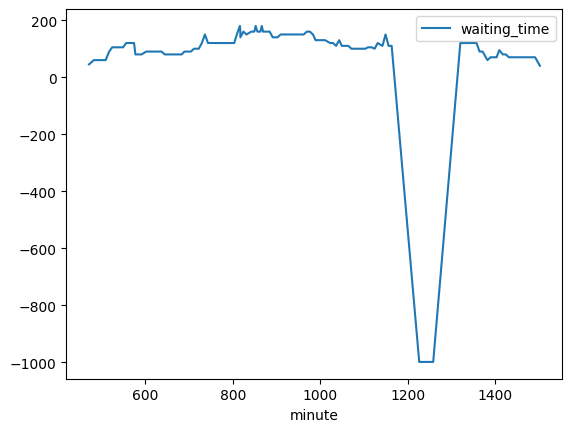

In [26]:
# nu even kijken of we dat kunnen plotten

#  voorgedefeinieerde selectiewaarden
date = '01/01/2015'
attraction = '7_dwarfs_train'

#  doe nu de query om die dan in een plot te gaan steken, eerst de query, geeft 135 rijen
df_waiting_posted.query("date == @date and attraction == @attraction")

#  gebruik dat dan in een plotje
(df_waiting_posted.query("date == @date and attraction == @attraction")
            .plot(x = 'minute',
                  y = 'waiting_time'))

#  probleem .. een sprong in de gegevens 20 tot 500 
#  2de probleem .. ineens een drop in de gegevens


In [27]:
print(df_waiting_posted.describe())
#  gemiddelde negatief ? vanwege min ? 
print(df_waiting_posted.waiting_time.min())
#  -999 ! Attractie is gesloten blijkbaar .. wordt zo ingebracht ... er zal moeten op gefilterd worden, want we moeten niet weten wanneer ze gesloten is

                            datetime  waiting_time        minute
count                       10113751  1.011375e+07  1.011375e+07
mean   2018-08-10 17:20:13.534183680 -9.962901e+01  9.243975e+02
min              2015-01-01 07:09:12 -9.990000e+02  1.800000e+02
25%              2017-01-14 20:27:11  1.000000e+01  7.060000e+02
50%              2018-08-19 09:27:07  2.000000e+01  9.190000e+02
75%              2019-12-22 19:13:02  4.500000e+01  1.134000e+03
max              2021-12-28 23:00:27  3.900000e+02  1.618000e+03
std                              NaN  3.493865e+02  2.585429e+02
-999.0


<Axes: xlabel='minute'>

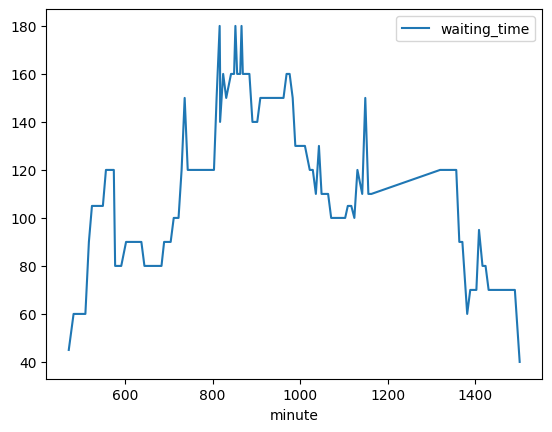

In [28]:
#  selecteer alle gegevens (indexen) waarvoor geldt dat ze -999 zijn
df_waiting_actual = df_waiting_actual.loc[df_waiting_actual.waiting_time > -998 ]
df_waiting_posted = df_waiting_posted.loc[df_waiting_posted.waiting_time > -998 ]

(df_waiting_posted.query("date == @date and attraction == @attraction")
            .plot(x = 'minute',
                  y = 'waiting_time'))

#  afbeelding nu beter, enkel die gap nog ..., zijn de x = 'minute' na middernacht (attractie open na middernacht). 
#  De hoeveelheid minuten na middernacht beginnen bij 0 en worden klein
#  als we weten dat attracties tot 03:00 'nachts maximaal open zijn en het park niet opent voor 03:00 's nachts, kunnen we dat oplossen
#  door de dag letterlijk 3 uren voorruit te schuiven zodat de 0 waarden vallen in 21:00 tot 23:59:59 

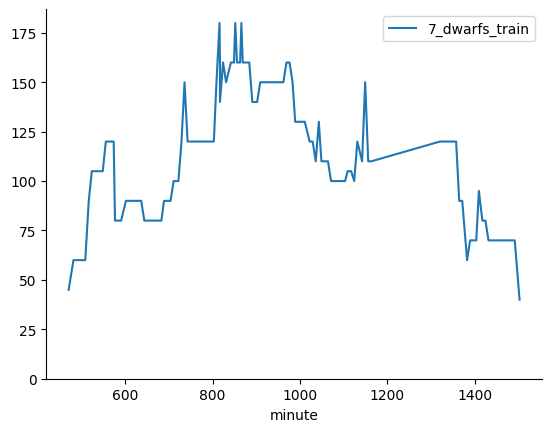

In [29]:
#  mooi maken van de plot

#  todo .. de legende is anders, we hebben meer lijntje, de y as begint op 0 en de topline (in de gevraagde afbeelding die je niet ziet dan enkel op de video)

fig, ax = plt.subplots()
(df_waiting_posted.query("date == @date and attraction == @attraction")
            .plot(x = 'minute',
                  y = 'waiting_time',
                  label = attraction,
                  ax = ax))
ax.set_ylim(bottom = 0)
ax.spines[['top','right']].set_visible(False)

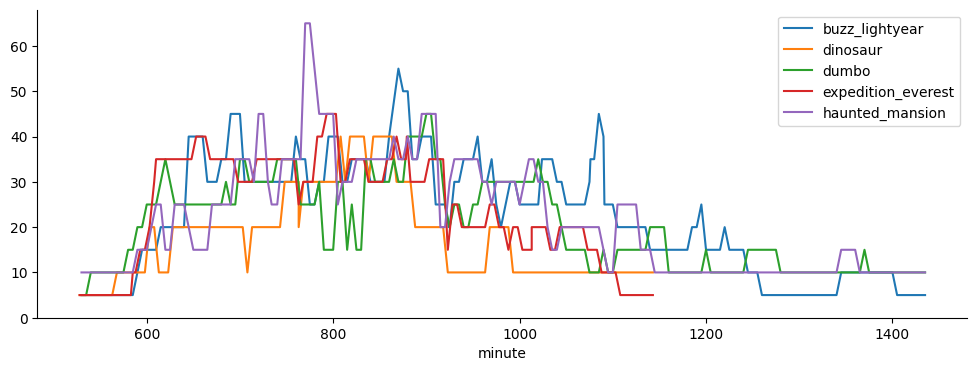

In [30]:
#  doe dat nu voor alle attracties

date = '03/01/2015'
# attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion', '7_dwarfs_train' ]
attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion']


fig, ax = plt.subplots(figsize = (12, 4)) # nummers size in inches
for attraction in attractions:
      (df_waiting_posted.query("date == @date and attraction == @attraction")
                  .plot(x = 'minute',
                        y = 'waiting_time',
                        label = attraction,
                        ax = ax))
      
ax.set_ylim(bottom = 0)
ax.spines[['top','right']].set_visible(False)

In [31]:
# Maak hier de functie die we hierboven hebben ontworpen

def visualize_waiting(df, attractions, date):

    fig, ax = plt.subplots(figsize = (12, 4)) # nummers size in inches
    for attraction in attractions:
        (df.query("date == @date and attraction == @attraction")
                    .plot(x = 'minute',
                            y = 'waiting_time',
                            label = attraction,
                            ax = ax,
                            marker = 'o'))
        
    ax.set_ylim(bottom = 0)
    ax.spines[['top','right']].set_visible(False)

    return fig, ax

(<Figure size 1200x400 with 1 Axes>, <Axes: xlabel='minute'>)

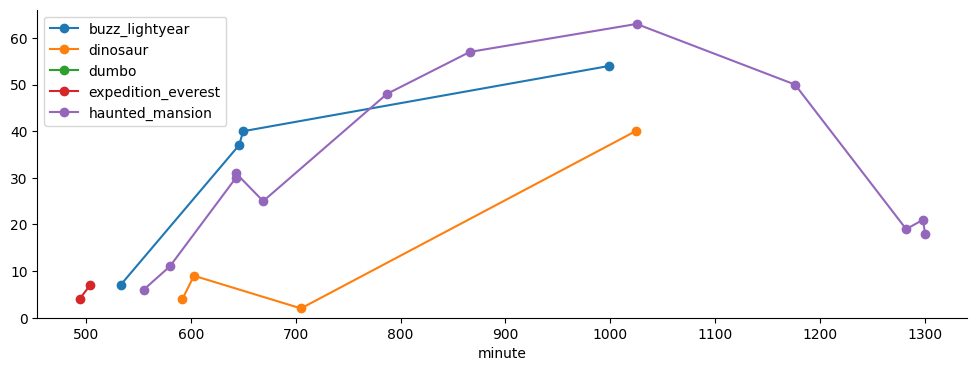

In [32]:
date = '01/02/2015'
attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion']

# visualize_waiting(df_waiting_posted, attractions, date)
visualize_waiting(df_waiting_actual, attractions, date)

# Stap 3 : Voor welke attracties genoeg info over wachttijden (41:58)

Study for which attractions we have sufficient information for posted waiting time.
Look into how many data points of posted waiting time you have per day for each attraction. This way,
you can exclude those attractions with too few data points on average.

In [50]:
# gaat over posted waiting times
df_waiting_posted
df_waiting_posted.head()

,date,datetime,waiting_time,attraction,minute
0,01/01/2015,2015-01-01 07:51:12,45.0,7_dwarfs_train,471
1,01/01/2015,2015-01-01 08:02:13,60.0,7_dwarfs_train,482
2,01/01/2015,2015-01-01 08:09:12,60.0,7_dwarfs_train,489
3,01/01/2015,2015-01-01 08:16:12,60.0,7_dwarfs_train,496
4,01/01/2015,2015-01-01 08:23:12,60.0,7_dwarfs_train,503


In [49]:
# df_waiting_posted.isnull().any .. merk het verschil tussen any en any() !!
# alles heeft zinnige data : de vraag is 'how many data points for posted wiaiting time' dus tellen per dag per attractie ...
df_waiting_posted.isnull().any()

date            False
datetime        False
waiting_time    False
attraction      False
minute          False
dtype: bool

In [62]:
#  de size van een dataframe geeft het aantal rijen !

# df_waiting_posted.groupby(['date', 'attraction']).size() 
# -- dit geeft de output als een 'multi index' niet een dataframe ...

# df_waiting_posted.groupby(['date', 'attraction']).size().reset_index().rename({0 : 'observations'}, axis=1)  
# dit geeft als resultaat een dataframe, let op de () achter reset_index () !
# let ook op de rename : is een rename van de kolommen van het dataframe

#  en dan nog wat grouping = backets rondom () om over meerder lijnen te kunnen werken
(df_waiting_posted.groupby(['date', 'attraction'])
                .size()
                .reset_index()
                .rename({0 : 'observations'}, axis=1)
                )


,date,attraction,observations
0,01/01/2015,7_dwarfs_train,132
1,01/01/2015,astro_orbiter,139
2,01/01/2015,barnstormer,145
3,01/01/2015,big_thunder_mtn,133
4,01/01/2015,buzz_lightyear,148
...,...,...,...
74853,12/31/2020,splash_mountain,111
74854,12/31/2020,tom_land_speedway,106
74855,12/31/2020,toy_story_mania,106
74856,12/31/2020,under_the_sea,121


In [66]:
#  we maken nu een goede vizualisatie ... ook om vast te stelen welke attracties GEMIDDELD te weinig data punten hebben
#  we gebruiken dezelfde statement en doen nog eens extra een groupby .. blijkbaar !!
# (df_waiting_posted.groupby(['date', 'attraction'])
#                 .size()
#                 .reset_index()
#                 .rename({0 : 'observations'}, axis=1)
#                 .groupby('attraction')['observations']
#                 .mean()
#                 )


#  deze oplossing geeft een dataframe 
(df_waiting_posted.groupby(['date', 'attraction'])
                .size()
                .reset_index()
                .rename({0 : 'observations'}, axis=1)
                .groupby('attraction')[['observations']]
                .mean()
                )

# interpretaie gemiddelde .. enkel zinnige data .. sommige attractiez zijn recent, andere niet, is dus geen issue

,observations
attraction,
7_dwarfs_train,124.650386
alien_saucers,115.533207
astro_orbiter,121.917073
barnstormer,122.919811
big_thunder_mtn,123.668468
buzz_lightyear,128.895217
carousel_of_progress,106.792899
country_bears,70.801325
dinosaur,103.262873


In [72]:
#  deze oplossing geeft een gesorteerd dataframe 
(df_waiting_posted.groupby(['date', 'attraction'])
                .size()
                .reset_index()
                .rename({0 : 'observations'}, axis=1)
                .groupby('attraction')[['observations']]
                .mean()
                .sort_values( by = 'observations')
                )

,observations
attraction,
liberty_sq_riverboat,44.882353
pirate_s_adventure,45.750000
tom_sawyer_island,47.946809
enchanted_tiki_rm,66.035156
hall_of_presidents,68.200000
country_bears,70.801325
sorcerers_of_the_mk,75.285714
it_s_a_small_world,97.635770
swiss_family_tree,101.225513


<Axes: ylabel='attraction'>

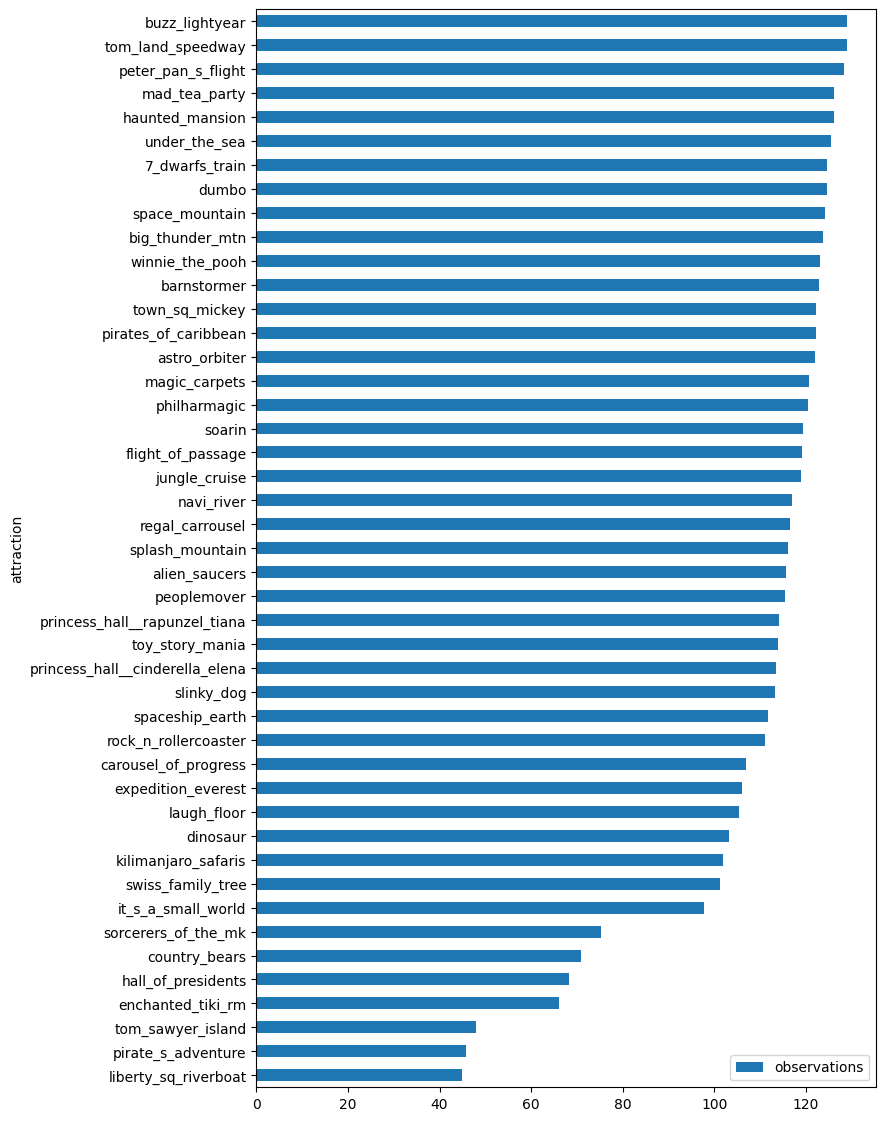

In [73]:
#  deze oplossing geeft een vizualisatie door het .plot statement er nog achteraan
#  let ook op de sorting van de data voorafgaandelijk

fig, ax = plt.subplots(figsize = (8, 14)) # breed = 8, 14 = hoog

(df_waiting_posted.groupby(['date', 'attraction'])
                .size()
                .reset_index()
                .rename({0 : 'observations'}, axis=1)
                .groupby('attraction')[['observations']] # waarom hier () en dan [] .. groot mysterie ... [[]] geeft een datafreme, nog een mysterie
                .mean()
                .sort_values( by = 'observations')
                .plot
                .barh( ax = ax )  # ax groote is genomen van de ax erboven ax = ax = true ???
                )

Conclusie, misschine eerst onderzoek doen op buzz_lightyear

# Stap 4 : Bestudeer de spreiding van de beschikbaarheid van de gegevens (50:55)

## There seems to be not that much information on the actual waiting times at attractions (50:55)


Is this because you
simply have limited data each day, or are there some days with a lot of information? Can you make some
visualizations to look into this?  

In [79]:
#  eerst de gewone data eens bekijken voor de actuals
#  we zien per attractie maar erg weinig data punten
(df_waiting_actual.groupby(['date', 'attraction'])
                .size()
                .reset_index()
                .rename({0 : 'observations'}, axis=1)
                 )

,date,attraction,observations
0,01/01/2015,7_dwarfs_train,2
1,01/01/2015,barnstormer,1
2,01/01/2015,big_thunder_mtn,1
3,01/01/2015,buzz_lightyear,2
4,01/01/2015,country_bears,1
...,...,...,...
57574,12/31/2020,splash_mountain,5
57575,12/31/2020,tom_land_speedway,4
57576,12/31/2020,toy_story_mania,9
57577,12/31/2020,under_the_sea,6


In [80]:
#  deze oplossing geeft een gesorteerd dataframe, maar dan voor actuals !!
(df_waiting_actual.groupby(['date', 'attraction'])
                .size()
                .reset_index()
                .rename({0 : 'observations'}, axis=1)
                .groupby('attraction')[['observations']]
                .mean()
                .sort_values( by = 'observations')
                )

,observations
attraction,
sorcerers_of_the_mk,1.000000
liberty_sq_riverboat,1.028986
tom_sawyer_island,1.077419
hall_of_presidents,1.095238
princess_hall__cinderella_elena,1.095506
princess_hall__rapunzel_tiana,1.151515
country_bears,1.152866
town_sq_mickey,1.166220
enchanted_tiki_rm,1.211454


<Axes: ylabel='Frequency'>

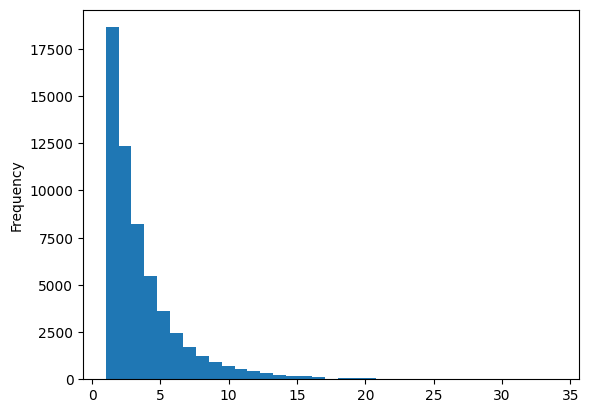

In [81]:
#  observeren, maar dan grafisch 
# probeer ook eens de paramater bins weg te laten by hist(), 
# we zien het aantal verschillende waarden maar niet mooit ingeplot omdat we de bins niet hebben gespecifieerd
(df_waiting_actual.groupby(['date', 'attraction'])
                .size()
                .reset_index()
                .rename({0 : 'observations'}, axis=1)
                ['observations'] # dit is waar we willen het historgram over plotten
                .plot
                .hist(bins = 35) 
                 )

# De frequencey (het voorkome) van waarde is ERG hoog = 1 data punt per dag is echter te weinig ..
# Dat is weinig zinnige gegevens 
# niet bruikbaar voor evolutieve afbeeldingen

## Research Question 1: Compare predicted and actual waiting time (55:01)

Create a visualization that shows how the predicted and actual waiting times compare, one option would be
to execute the following steps:
- For each actual waiting time, find the previous and next posted waiting time.
- Use linear interpolation to find the best estimate of posted waiting time for the actual waiting time we
are investigating.
- Compute the difference between the actual and posted waiting time.
- Create a histogram of all these differences, you can also use a scatterplot and a heatmap/2D histogram.  

You can then look at some specific dates and attractions for which you have a lot of actual waiting time
information for and then plot the actual and posted waiting time together ina single plot.  

### 4.1.1 For each actual waiting time, find the previous and next posted waiting time.

### 4.1.2 Use linear interpolation to find the best estimate of posted waiting time for the actual waiting time we are investigating.  

### 4.1.3 Compute the difference between the actual and posted waiting time.  


### 4.1.4 Create a histogram of all these differences, you can also use a scatterplot and a heatmap/2D histogram.  

## Research Question 2: best day for rides

Filter out the attractions which have category_code == ride and find out which day of the week
(Monday/Tuesday/...) these rides have the smallest posted waiting times on average. In a second step, try to
further look specifically into the combination of day of the week and HOLIDAYM value. Ideally, you should also
explain what this means.